# ===================================================================  FIRST ASSIGNMENT ===================================================================

# ===================================================================  PART 1 ===================================================================

In [100]:
#Quitar markup en caso se esté en virtual environment y no esté funcionando la librería
#!pip uninstall -y sms-tools
#!pip install --no-cache-dir git+https://github.com/MTG/sms-tools.git@master

In [101]:
import sys
sys.path.append('../software/models/')  
import numpy as np
from smstools.models.utilFunctions import wavread
import matplotlib.pyplot as plt

# Función escalable para poner x sample de primero y n samples que necesite despues
def read_audio_samples(input_file, first_sample, num_samples):
    fs, x = wavread(input_file)              
    if x.ndim == 2: #fur 2 channels
        x = x[:, 0]
    start = int(first_sample) - 1
    stop  = start + int(num_samples)
    return x[start:stop]
    return fs

# usaré el piano.wav, segun instrucciones primer sample el 50001 y 10 samples necesitamos
print("==================== RESULT ================")
# usaremos segmento para jalar la misma cosa en donde sea
segmento = read_audio_samples("../sounds/piano.wav", 50001, 10)

#imprimir el segmento
print(segmento, "\n","Muestras: ",len(segmento))

print("==================== END OF RESULT ================")


==================== RESULT ================
[-0.06213379 -0.04541016 -0.02734375 -0.00939941  0.00769043  0.02319336
  0.03503418  0.04309082  0.04626465  0.04418945] 
 Muestras:  10
==================== END OF RESULT ================


# ===================================================================  PART 2 ===================================================================

In [102]:

def min_max_audio(input_file):
     
    ### Your code here
    # Leer el file
    fs, x_full = wavread(input_file)
    if x_full.ndim == 2:
        x_full = x_full[:, 0] # por si hay dos canales

    # mis mins y max
    min_val = float(x_full.min())
    max_val = float(x_full.max())


    print("El len(segmento) es=", len(x_full))
    print("Verificacion de dtype:", x_full.dtype)
    print("==================== RESULT ================")
    print("The min/max values are:", min_val, max_val)
    print("==================== END OF RESULT ================")
    print("\n")

    #print("==================== quick test ================")

    # test
    ref = x_full[50000:50010]
    #print("Estan los min and max within the sample? True or false:", np.allclose(ref, ref))
    #print("segmento =", ref)

    # resultado
    #return (min_val, max_val)
    #return min_val, max_val, fs, x_full  
    return min_val, max_val, fs, x_full



min_val, max_val, fs, x_full = min_max_audio("../sounds/oboe-A4.wav")

El len(segmento) es= 150529
Verificacion de dtype: float32
==================== RESULT ================
The min/max values are: -0.8348388671875 0.56500244140625
==================== END OF RESULT ================




# ===================================================================  PART 3 ===================================================================

In [103]:
def hop_samples(x, M):

    if not isinstance(M, int) or M <= 0:
        raise ValueError("M must ser entero positivo.")
    if M >= len(x):
        raise ValueError("M must ser menor que x.")

    return x[::M]


x = np.arange(10)
M = 2
print("Result for third part")
print(hop_samples(x, M))

Result for third part
[0 2 4 6 8]


# ===================================================================  PART 4 ===================================================================

In [104]:
from smstools.models.utilFunctions import wavread, wavwrite

def down_sample_audio(input_file, M):
    if M <= 0 or not isinstance(M, int):
        raise ValueError("M debe ser un entero positivo.")
    
    fs, x = wavread(input_file)
    if x.ndim == 2:
        x = x[:, 0] 

    y = x[::M]
    fs_new = fs // M

    print("==================== RESULT ====================")
    print(f"Archivo utilizado: {input_file}")
    print(f"Frecuencia original: {fs} Hercios")
    print(f"Nueva frecuencia: {fs_new} Hertz")
    print(f"Tamaño original: {len(x)} muestras")
    print(f" Test para mostrar que si lo downsampleamos, tenemos: {len(y)} muestras")
    print("================================================")
    
    return x, fs, y, fs_new

Part 4.2

==================== RESULT ====================
Archivo utilizado: ../sounds/vibraphone-C6.wav
Frecuencia original: 44100 Hercios
Nueva frecuencia: 3150 Hertz
Tamaño original: 143336 muestras
 Test para mostrar que si lo downsampleamos, tenemos: 10239 muestras


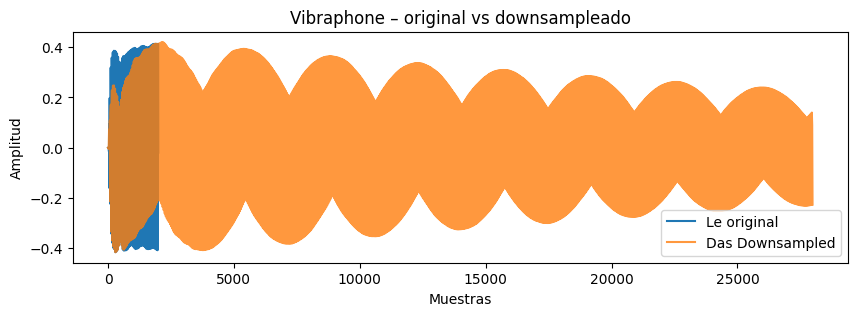

Audio original:


Audio downsampleado:


In [105]:
import IPython.display as ipd
import matplotlib.pyplot as plt

# para ventana emergente pero necesita instalar una dependencia con homebrew
#from tkinter import Tk
#from tkinter.filedialog import askopenfilename

#Tk().withdraw()


# Caso 1
x, fs, y, fs_new = down_sample_audio("../sounds/vibraphone-C6.wav", 14)

# Esto es por si configuramos la ventana emergente - descartado por el momento, mucho error
#input_file = askopenfilename(filetypes=[("Archivos", "*.wav")])
#M = int(input("Factor de downsampling?"))
#x, fs, y, fs_new = down_sample_audio(input_file, M)

plt.figure(figsize=(10,3))
plt.plot(x[:2000], label="Le original")
plt.plot(np.arange(0, len(y)*14, 14)[:2000], y[:2000], label="Das Downsampled", alpha=0.8)
plt.title("Vibraphone – original vs downsampleado")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
#plt.grid(True)
plt.show()

# escuchar audios
print("Audio original:")
ipd.display(ipd.Audio(data=x, rate=fs))
print("Audio downsampleado:")
ipd.display(ipd.Audio(data=y, rate=fs_new))

Parte 4.3

==================== RESULT ====================
Archivo utilizado: ../sounds/sawtooth-440.wav
Frecuencia original: 44100 Hercios
Nueva frecuencia: 3150 Hertz
Tamaño original: 44100 muestras
 Test para mostrar que si lo downsampleamos, tenemos: 3150 muestras


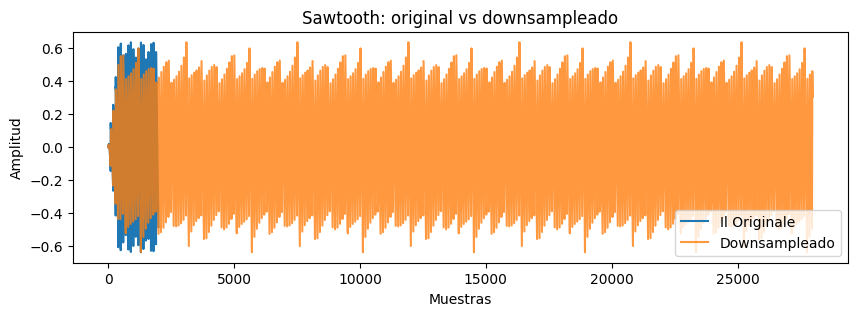

Audio original:


Audio downsampleado:


In [106]:
x, fs, y, fs_new = down_sample_audio("../sounds/sawtooth-440.wav", 14)

plt.figure(figsize=(10,3))
plt.plot(x[:2000], label="Il Originale")
plt.plot(np.arange(0, len(y)*14, 14)[:2000], y[:2000], label="Downsampleado", alpha=0.8)
plt.title("Sawtooth: original vs downsampleado")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()

plt.show()

print("Audio original:")
ipd.display(ipd.Audio(data=x, rate=fs))
print("Audio downsampleado:")
ipd.display(ipd.Audio(data=y, rate=fs_new))

# QUESTIONS 

**Questions: (answer here)**

 E1 - 4.3: Explain the results of part 4. What happened to the output signals compared to the input ones? Is there a difference between the 2 cases? Why? How could we avoid damaging the signal when downsampling it?

**Answer**

The quality got worse because downsampling (as the word suggests) reduces the amount of samples. We lost detail also the high frequencies are dimmed.

We could avoid it with a filter, before downsampling. Low pass or band pass maybe.

# -
# -
# -
# -





# ANEXOS
# GENERAL PLOTTING FOR VISUAL PURPOSES

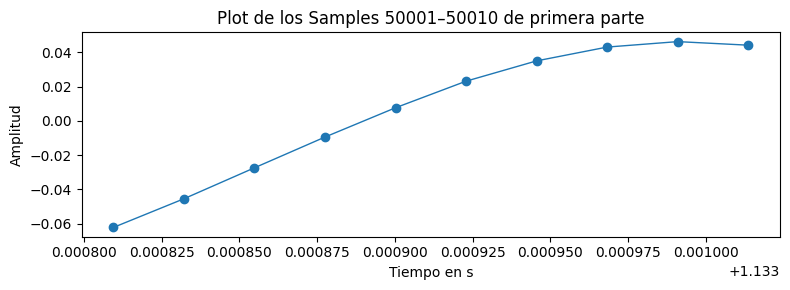

In [107]:
t = np.arange(50001, 50001 + len(segmento)) / fs

plt.figure(figsize=(8, 3))
plt.plot(t, segmento, marker='o', linestyle='-', linewidth=1)
plt.xlabel("Tiempo en s")
plt.ylabel("Amplitud")
plt.title("Plot de los Samples 50001–50010 de primera parte")

plt.tight_layout()
plt.show()

El len(segmento) es= 150529
Verificacion de dtype: float32
==================== RESULT ================
The min/max values are: -0.8348388671875 0.56500244140625
==================== END OF RESULT ================




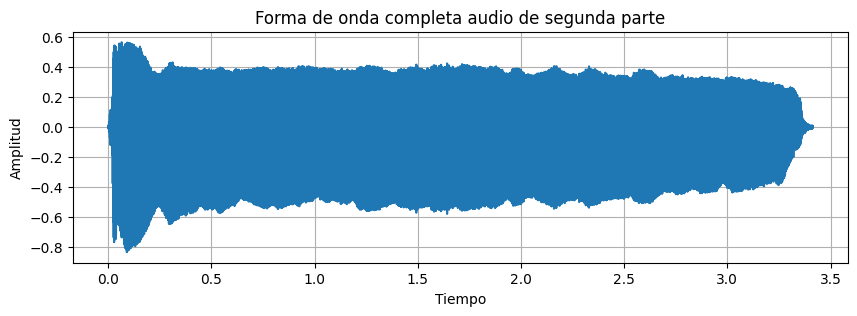

In [108]:
# Plot de la parte 2

min_val, max_val, fs, x_full = min_max_audio("../sounds/oboe-A4.wav")

t = np.arange(len(x_full)) / fs
plt.figure(figsize=(10,3))
plt.plot(t, x_full)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Forma de onda completa audio de segunda parte")
plt.grid(True)
plt.show()